<a href="https://colab.research.google.com/github/shhesterka04/Quantum-Insights/blob/polina/Bernstein_Vazirani_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bernstein-Vazirani Algorithm**

Устанавливаем библиотеки:

In [1]:
!pip install qiskit --quiet
!pip install matplotlib --quiet
!pip install pylatexenc --quiet
!pip install qiskit.providers.ibmq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement qiskit.providers.ibmq (from versions: none)
ERROR: No matching distribution found for qiskit.providers.ibmq


In [2]:
from qiskit.quantum_info import Statevector, Operator
import numpy as np
import pylatexenc

In [3]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
from qiskit.providers.ibmq import least_busy

Сначала мы устанавливаем количество кубитов, используемых в эксперименте, и скрытую битовую строку, которую должен найти алгоритм. Скрытая битовая строка определяет схему квантового оракула.

In [4]:
n = 5 # number of qubits used to represent s
s = '01101'   # the hidden binary string

In [5]:
# Нам нужна схема с n кубитами плюс один вспомогательный кубит
# Также необходимо n классических битов для записи вывода
bv_circuit = QuantumCircuit(n+1, n)

# поместить вспомогательное устройство в состояние |->
bv_circuit.h(n)
bv_circuit.z(n)

# Применить вентили Адамара перед запросом к оракулу
for i in range(n):
    bv_circuit.h(i)

# Применить барьер
bv_circuit.barrier()

# Применить оракул внутреннего продукта
s = s[::-1] # перевернуть s, чтобы соответствовать порядку кубитов qiskit
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)

# Применить барьер
bv_circuit.barrier()

#Применить вентили Адамара после запроса к оракулу
for i in range(n):
    bv_circuit.h(i)

# Измерение
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

┌───┐      ░                      ░ ┌───┐┌─┐            
q_0: ┤ H ├──────░───■──────────────────░─┤ H ├┤M├────────────
     ├───┤      ░   │  ┌───┐           ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├──────░───┼──┤ I ├───────────░─┤ H ├─╫─┤M├─────────
     ├───┤      ░   │  └───┘           ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├──────░───┼─────────■────────░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░   │         │        ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░───┼─────────┼────■───░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░   │  ┌───┐  │    │   ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░───┼──┤ I ├──┼────┼───░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐└───┘┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ H ├┤ Z ├─░─┤ X ├─────┤ X ├┤ X ├─░───────╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘     └───┘└───┘ ░       ║  ║  ║  ║  ║ 
c: 5/══════════════════════════════════════════╩══╩══╩══╩══╩═
                                               0  1  2  3  4

In [6]:
!pip install qiskit-aer --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.9 MB/s eta 0:00:00


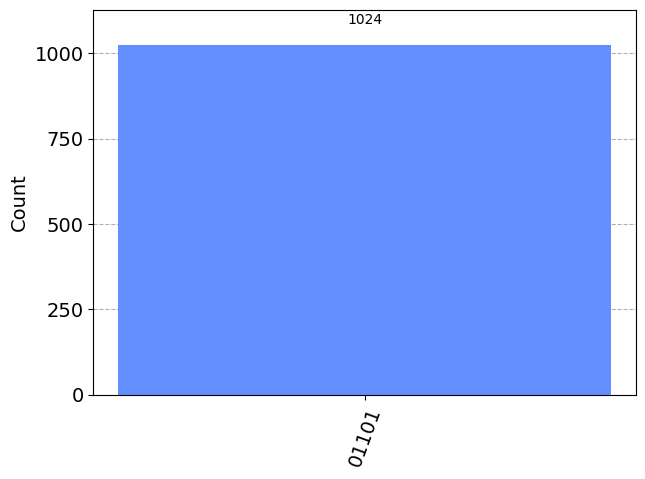

In [7]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(bv_circuit).result()
answer = results.get_counts()

plot_histogram(answer)